In [10]:
import pathlib
import logging
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Register the parent directory as a path to look for modules
notebook_dir = pathlib.Path().resolve()
parent_dir = notebook_dir.parent
if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))

from app.utils.dataset_builder.prisma_dataset_builder import PrismaDatasetBuilder
from app.models.file_processing.sources import FileSourceConfig
from app.utils.image_transformation.image_cube_operations import ImageCubeOperations, CubeRepresentation

logger = logging.getLogger("notebook")
logger.setLevel(logging.INFO)
ch = logging.StreamHandler(sys.stdout)
ch.setLevel(logging.INFO)

In [16]:
# First select a dataset and then use it to initialize the builder
builder = PrismaDatasetBuilder(
    file_source_configuration=FileSourceConfig(
        source_path="../tests/test_payloads/phase_2/Set-1/Hypersepctral Datasets/PRS_L2D_STD_20201214060713_20201214060717_0001.he5"
    )
)
vendable = builder.vend_dataset()

Using device: mps
Using device: mps


In [17]:
cuber = ImageCubeOperations()
raw_data = cuber.convert_cube(
    cube=vendable.normalized_hyperspectral_cube,
    from_format=CubeRepresentation.BSQ,
    to_format=CubeRepresentation.BIP
)

validity = cuber.convert_cube(
    cube=vendable.validity_cube,
    from_format=CubeRepresentation.BSQ,
    to_format=CubeRepresentation.BIP
)

full_data = raw_data * validity
masked_data = np.ma.masked_where(
    full_data == 0, full_data
)

Using device: mps


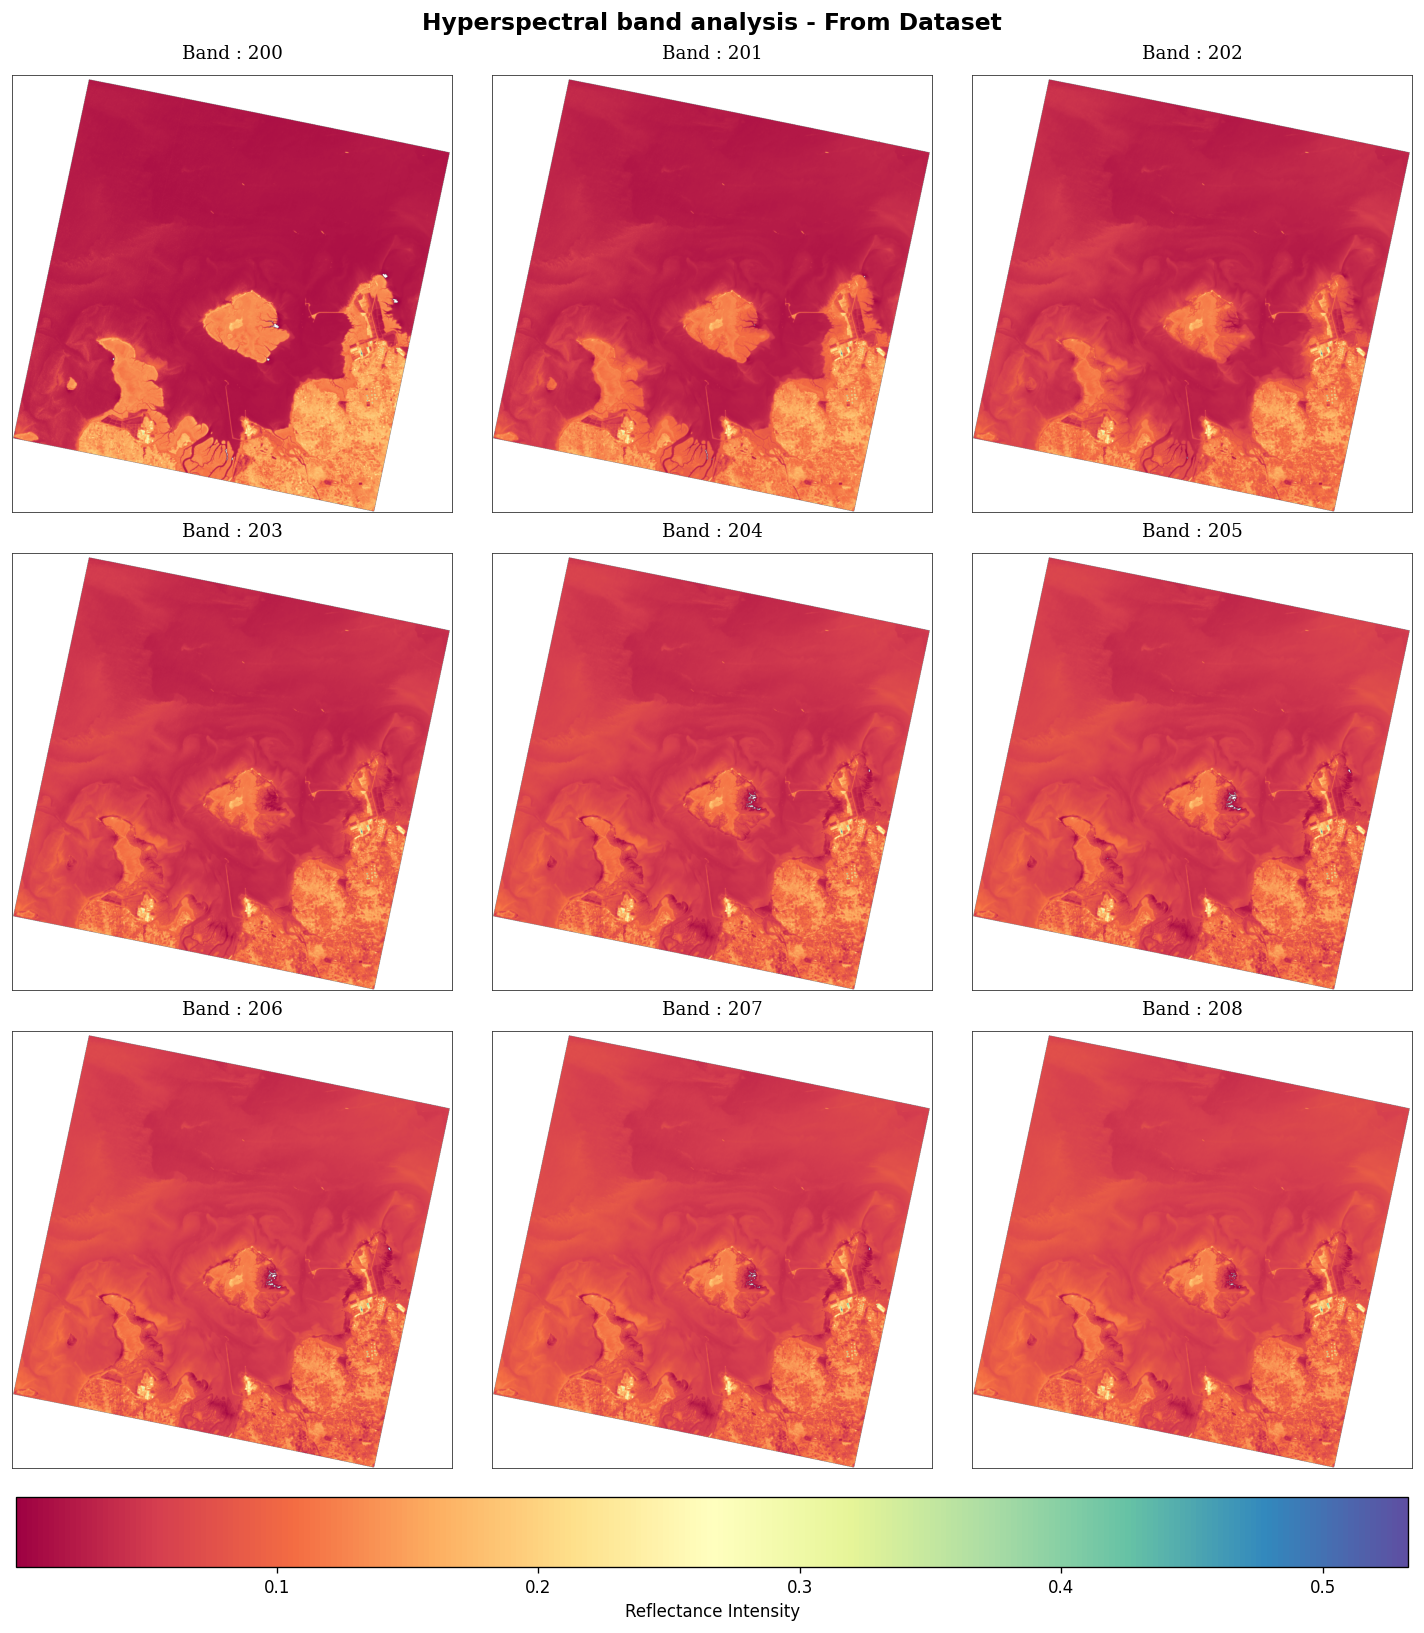

In [23]:
import math
bands_to_visualize = [200,201,202,203,204,205,206,207,208]
num_plots = len(bands_to_visualize)
num_rows = math.ceil(num_plots / 3)

# Set up the plot
# Set up the plot
fig, axes = plt.subplots(
    num_rows,
    3,
    figsize=(4 * 3, 4.5 * num_rows),
    constrained_layout=True,
    dpi=120,
)

fig.suptitle(
    f"Hyperspectral band analysis - From Dataset",
    fontsize=14,
    fontweight="bold",
)
axes_flat = axes.flatten() if num_plots > 1 else [axes]
plot_images = []


## Do the actual plotting
for i, ax in enumerate(axes_flat):
    if i < num_plots:
        single_band = masked_data[:,:,bands_to_visualize[i]]
        im = ax.imshow(single_band, cmap="Spectral")
        plot_images.append(im)
        label_text = f"Band : {bands_to_visualize[i]}"
        ax.set_title(label_text, fontsize=11, fontfamily="serif", pad=10)
        ax.set_xticks([])
        ax.set_yticks([])
        for spine in ax.spines.values():
            spine.set_edgecolor("#333333")
            spine.set_linewidth(0.5)
    else:
        ax.axis("off")
# visualize the band
if plot_images:
    cbar = fig.colorbar(
        plot_images[-1],
        ax=axes,
        orientation="horizontal",
        fraction=0.05,
        pad=0.02,
    )
    cbar.set_label("Reflectance Intensity", fontsize=10)
plt.savefig(f"assets/datasetbuilder_test2.jpg")


